The current version of `SpinPlots` only works with processed Bruker data. If you’re dealing with unprocessed data or using data from a different brand, we recommend using [NMRglue](https://www.nmrglue.com/) instead. Also, if you want more control over the looks of your plot, `SpinPlots` might feel a bit limited since it mostly sticks to the default matplotlib style for now.

For this tutorial a series of <sup>13</sup>C,<sup>15</sup>N-labelled Tyrosine and <sup>13</sup>C,<sup>15</sup>N labelled Glycine spectra are used to show the implementation of `SpinPlots`.

In [1]:
from __future__ import annotations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from spinplots.io import read_nmr

## Plot 1D spectra

Here is how to load and plot a simple 1D spectrum of Tyrosine acquired at 9.4T using a MAS rate of 10kHz

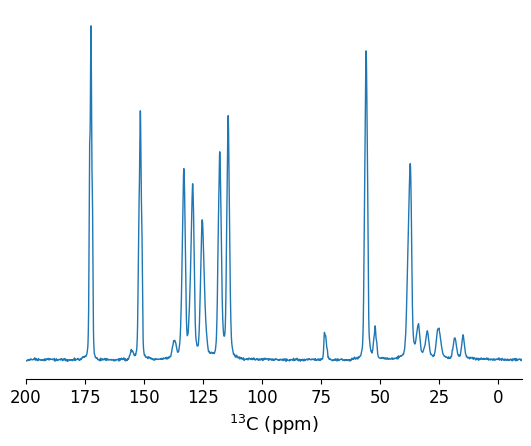

In [2]:
tyr = read_nmr("../../data/1D/tyrosine/pdata/1")
tyr.plot(xlim=(200, -10))

`SpinPlots` uses Matplotlib's standard style by default. If you want to customize the appearance of your spectra, you can use the option `return_fig=True`. This allows you to return the figure object and modify it as needed before displaying or saving it.

### Costumization of 1D spectra

The `plot` function has a bunch of useful features beyond just making a simple plot. Some of the key ones include:

- Plotting several plots together
- Plot with/without frame
- Labelling of spectra
- Normalization of data
- Select colors for each spectrum using [matplotlib's colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- Saving the plot directly to a file

The following examples includes all options currently available in the `plot` for 1D data function.

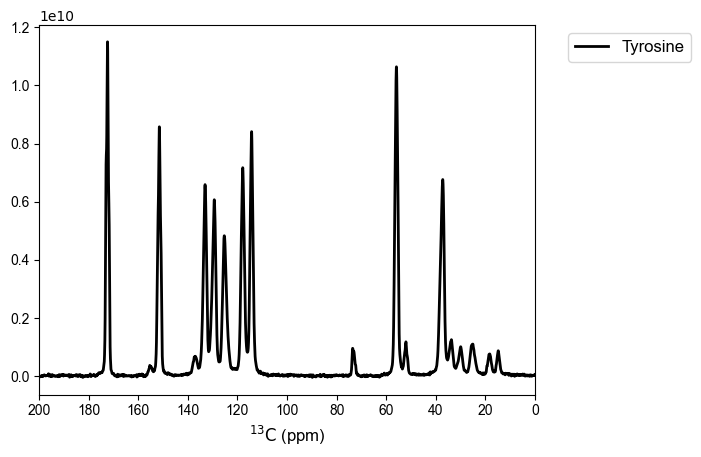

In [3]:
tyr.plot(
    labels=["Tyrosine"],  # Set the labels for the spectra
    color=["black"],  # Set the colors for the spectra
    xlim=(200, 0),  # Set the x-axis limits
    alpha=1,  # Set the transparency of the lines (1 for no transparency, 0 for transparent)
    linewidth=2,  # Set the line width
    linestyle="-",  # Set the line style (styles, e.g. '--', ':', '-.', etc.)
    axisfont="Arial",  # Set the font style of the axis labels
    axisfontsize=12,  # Set the font size of the axis labels
    tickfont="Arial",  # Set the font style of the tick labels
    tickfontsize=10,  # Set the font size of the tick labels
    tickspacing=20,  # Set the spacing between the ticks on X-axis
    frame=True,  # Set True or False to add or remove frame
    save=False,  # Set True or False to save the figure
    filename="../../data/1D/tyrosine_13C",  # Set the path and filename for saving the figure
    format="svg",
)  # Set the format of the saved figure (e.g. 'png', 'pdf', 'svg', etc.)

`plot` sets the Y-axis and X-axis labels automatically based on the data loaded.

The Y-axis and X-axis labels can be edited with the `yaxislabel` and `xaxislabel` options, as follows :

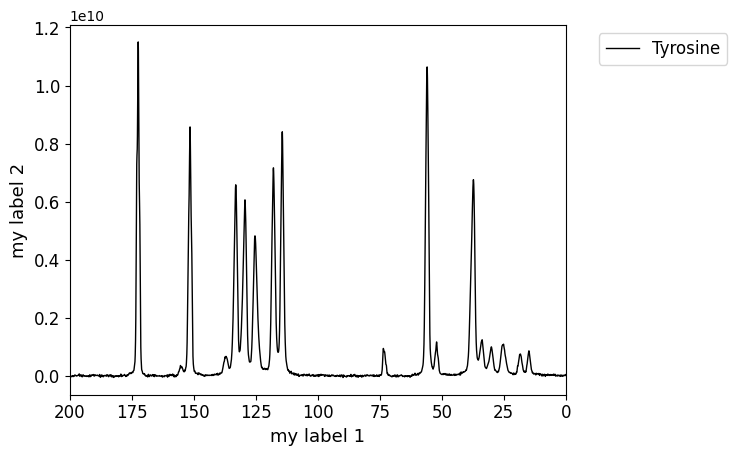

In [4]:
tyr.plot(
    labels=["Tyrosine"],
    color=["black"],
    xlim=(200, 0),
    xaxislabel="my label 1",  # Set the label for the x-axis
    yaxislabel="my label 2",  # Set the label for the y-axis
    frame=True,
    save=False,
    filename="../../data/1D/tyrosine_13C",
    format="svg",
)

#### Normalization

For multiple spectra, the `plot` function supports normalization of data and plot stacking. For this example two <sup>13</sup>C NMR datasets of Tyrosine and Glycine are used with different number of scans.

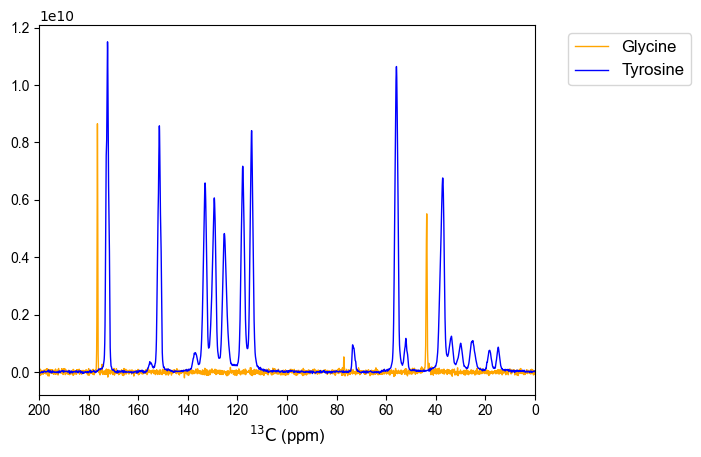

In [5]:
# Use a list of path to read multiple spectra
base_path = "../../data/1D/"
gly_tyr = read_nmr([base_path + "glycine/pdata/1", base_path + "tyrosine/pdata/1"])
gly_tyr.plot(
    labels=["Glycine", "Tyrosine"],
    color=["orange", "blue"],
    xlim=(200, 0),
    alpha=1,
    linewidth=1,
    linestyle="-",
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    frame=True,
    save=True,
    filename="../../data/1D/overlapped",
    format="svg",
)

The spectrum can be normalized using the `normalize` using either `max` or `scans` to normalize by the maximum number of the number of scans.

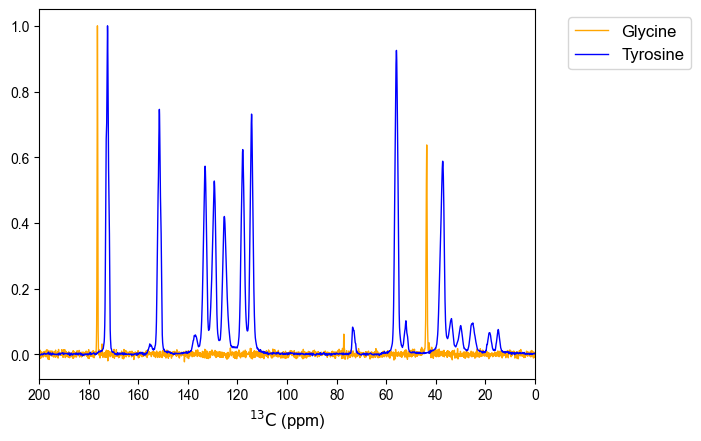

In [6]:
gly_tyr.plot(
    labels=["Glycine", "Tyrosine"],
    color=["orange", "blue"],
    xlim=(200, 0),
    alpha=1,
    linewidth=1,
    linestyle="-",
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    normalize="max",  # Normalized by maximum point
    frame=True,
    save=False,
    filename="../../data/1D/overlapped",
    format="svg",
)

#### Stacking

Multiple spectra can be plotted using the `stacked` option, as follows :

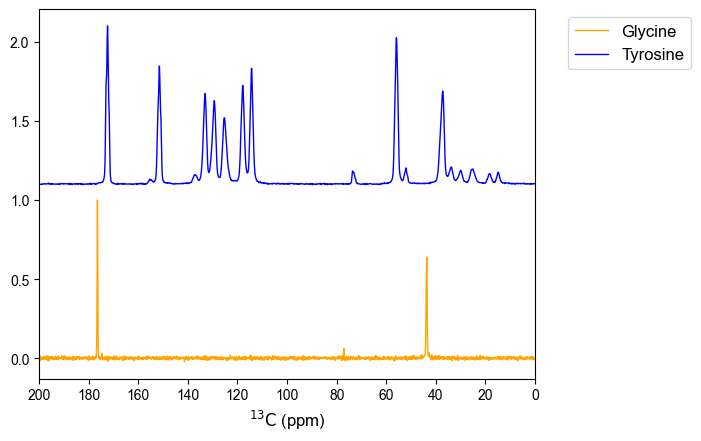

In [7]:
gly_tyr.plot(
    labels=["Glycine", "Tyrosine"],
    color=["orange", "blue"],
    xlim=(200, 0),
    alpha=1,
    linewidth=1,
    linestyle="-",
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    normalize="max",
    stacked=True,  # Set to True to stack the spectra
    frame=True,
    save=False,
    filename="../../data/1D/stacked",
    format="svg",
)

or with more plots

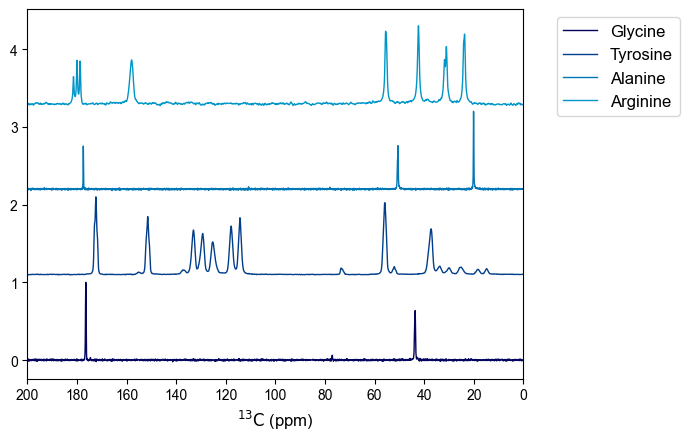

In [8]:
base_path = "../../data/1D/"
gly_tyr_ala_arg = read_nmr(
    [
        base_path + "glycine/pdata/1",
        base_path + "tyrosine/pdata/1",
        base_path + "alanine/pdata/1",
        base_path + "arginine/pdata/1",
    ]
)
gly_tyr_ala_arg.plot(
    labels=["Glycine", "Tyrosine", "Alanine", "Arginine"],
    color=[
        "#03045e",
        "#023e8a",
        "#0077b6",
        "#0096c7",
    ],  # Hex color codes is also supported
    xlim=(200, 0),
    alpha=1,
    linewidth=1,
    linestyle="-",
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    normalize="max",
    stacked=True,  # Set to True to stack the spectra
    frame=True,
    save=False,
    filename="../../data/1D/stacked",
    format="svg",
)

#### Grid

The `plot` allows the presentation of multiple spectra in a grid style (subplots), by using the option `grid='rows x columns`.

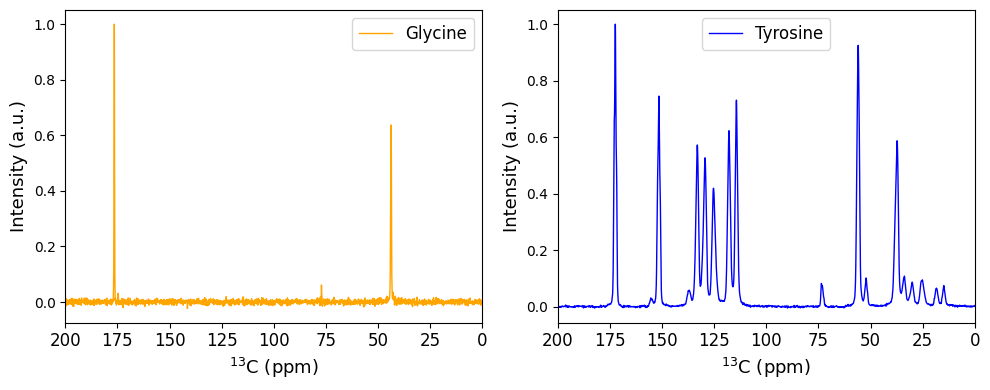

In [9]:
gly_tyr.plot(
    grid="1x2",  # Set the grid layout '1x2' for 1 row and 2 columns
    labels=["Glycine", "Tyrosine"],
    color=["orange", "blue"],
    xlim=(200, 0),
    frame=True,
    save=False,
    normalize="max",
    filename="../../data/1D/grid",
    format="svg",
)

More complex grid spaces can be created, as follows :

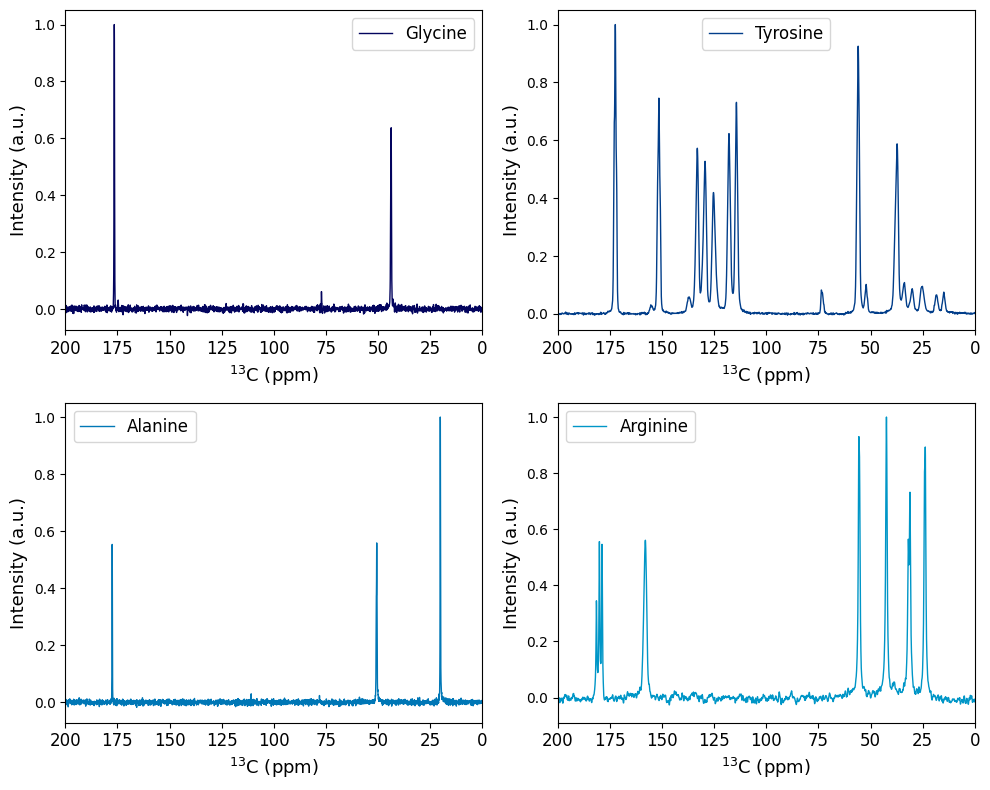

In [10]:
gly_tyr_ala_arg.plot(
    grid="2x2",  # Set the grid layout '2x2' for 2 rows and 2 columns
    labels=["Glycine", "Tyrosine", "Alanine", "Arginine"],
    color=[
        "#03045e",
        "#023e8a",
        "#0077b6",
        "#0096c7",
    ],  # Hex color codes is also supported
    xlim=(200, 0),
    normalize=True,
    frame=True,
    save=False,
    filename="../../data/1D/grid",
    format="svg",
)

## Plot 2D spectra

Lastly, the `plot` function makes it super easy to plot 2D NMR spectra. You just need to provide a bit more info to customize the plot. Here’s what you can specify:

- `countour_start`: the minimum value for the contour plot
- `countour_num`: how many contour levels you want
- `countour_factor`: the factor between each contour level
- `cmap`: the [matplotlib colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for countour (default is 'black')
- `colors`: can be used instead of `cmap` with values such as `blue`, `red`, etc.
- `xlim`: limits for the x-axis, i.e. direct dimension (F2)
- `ylim`: limits for the y-axis, i.e. indirect dimension (F1)
- `save`: whether you want to save the plot
- `filename`: the name to save the plot as
- `format`: the file format to save it



#### Heteronuclear correlation

The following example includes all options currently available in the `bruker2d` function.

A simple heteronuclear {<sup>1</sup>H}-<sup>13</sup>C 2D acquired at 9.4T using a MAS rate of 10kHz can be plotted, as follows :

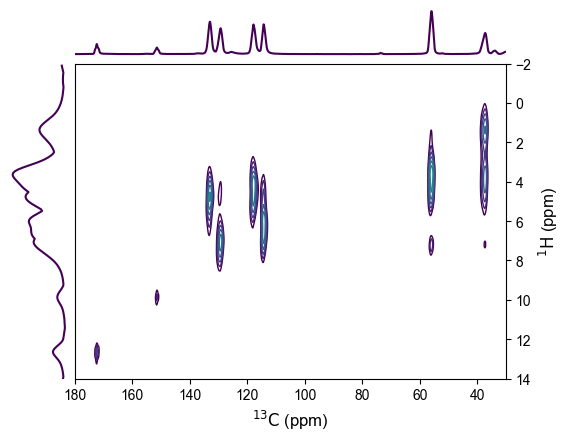

In [11]:
data_het = read_nmr("../../data/2D/43/pdata/1")
data_het.plot(
    contour_start=4e10,  # Set the starting value for the contour lines
    contour_num=12,  # Set the number of contour lines
    contour_factor=1.5,  # Set the factor for the contour lines
    cmap="viridis",  # Set the colormap for the contour plot. Available colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    xlim=(180, 30),  # Set the x-axis limits
    ylim=(14, -2),  # Set the y-axis limits
    linewidth_contour=1,  # Set the line width for the contour lines
    linewidth_proj=1.5,  # Set the line width for the projection lines
    axisfont="Arial",  # Set the font style of the axis labels
    axisfontsize=12,  # Set the font size of the axis labels
    tickfont="Arial",  # Set the font style of the tick labels
    tickfontsize=10,  # Set the font size of the tick labels
    tickspacing=20,  # Set the spacing between the ticks on X-axis
    save=False,  # Set True or False to save the figure
    filename="../../data/2D/2d_hetero",  # Set the path and filename for saving the figure
    format="png", # Set the format of the saved figure (e.g. 'png', 'pdf', 'svg', etc.)
)

#### Homonuclear correlation

Some NMR spectra, like double-quantum (DQ) experiments, are often visualized with a diagonal line representing `y=2x`. You can add this diagonal line for any line of the form `y=nx` using the keyword `diag=n`, where `n` sets the desired quantum order. The following example shows a <sup>13</sup>C-<sup>13</sup>C DQ-SQ experiment. The option `homo=True` is only needed if the y-axis label isn’t displaying correctly, such as when the DQ-SQ is acquired through CPMAS.

Similarly, a simple homonuclear <sup>13</sup>C-<sup>13</sup>C 2D can be plotted, as follows :

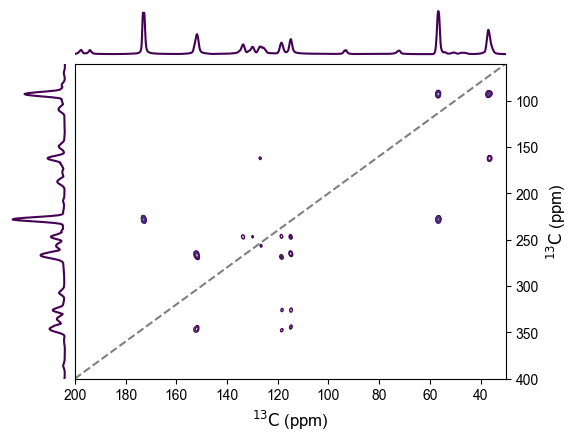

In [12]:
data_homo = read_nmr("../../data/2D/16/pdata/1")
data_homo.plot(
    contour_start=1e7,
    contour_num=25,
    contour_factor=1.5,
    cmap="viridis",
    xlim=(200, 30),
    ylim=(400, 60),
    linewidth_contour=1,
    linewidth_proj=1.5,
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    homo=True,  # Set to true if spectra is a homonuclear correlation
    diag=2,  # Set the diagonal splot 2 for DQ y=2x
    save=False,
    filename="../../data/2D/2d_homo",
    format="png",
)

`bruker2d` function sets the Y-axis and X-axis labels automatically based on the data loaded, but you can edit them with the `yaxislabel` and `xaxislabel` options, as follows :

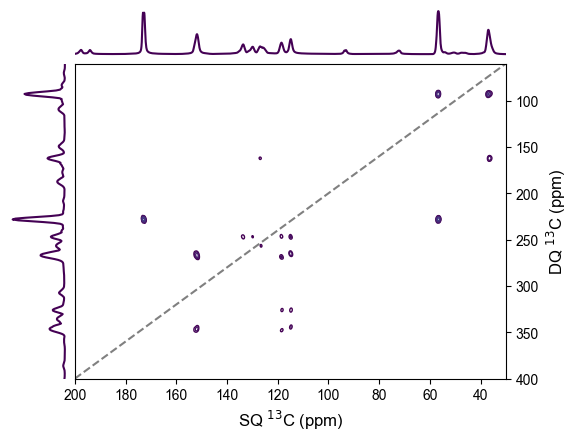

In [13]:
data_homo.plot(
    contour_start=1e7,
    contour_num=25,
    contour_factor=1.5,
    cmap="viridis",
    xlim=(200, 30),
    ylim=(400, 60),
    linewidth_contour=1,
    linewidth_proj=1.5,
    axisfont="Arial",
    axisfontsize=12,
    tickfont="Arial",
    tickfontsize=10,
    tickspacing=20,
    homo=True,
    diag=2,
    xaxislabel="SQ $^{13}$C (ppm)",  # Set the label for the X-axis
    yaxislabel="DQ $^{13}$C (ppm)",  # Set the label for the Y-axis
    save=False,
    filename="../../data/2D/2d_homo",
    format="png",
)